In [2]:
import scipy
import numpy as np

In [3]:
from scipy.stats import rv_continuous
class gaussian_gen(rv_continuous):
    "Gaussian distribution"
    def _pdf(self, x):
        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)
gaussian = gaussian_gen(name='gaussian')

In [4]:
gaussian.rvs(size=10)

array([-0.56658913, -1.33896049,  0.70113058,  1.42484152,  0.26330412,
       -0.55071435,  0.79126401,  1.22111943,  1.89746709, -0.98893594])

In [8]:
# Import some test data
AX1, AX2 = np.genfromtxt('data_axle.csv', delimiter=",", unpack = True)

In [20]:
fitted_params = gaussian.fit(AX1)
RV_gauss = gaussian(*fitted_params)

# Can we also directly feed the data to the gaussian class?
RV_gauss_2 = gaussian(AX1)

In [23]:
print(*fitted_params)

38.21592741935484 10.019741381624568


In [16]:
import matplotlib.pyplot as plt

(array([0.00079134, 0.00079134, 0.001187  , 0.00276967, 0.00316534,
        0.00593502, 0.00672635, 0.01266137, 0.02057472, 0.02650973,
        0.02492706, 0.03956677, 0.04827146, 0.0379841 , 0.03877543,
        0.03363175, 0.0257184 , 0.01938772, 0.01820071, 0.01187003,
        0.00553935, 0.00514368, 0.00316534, 0.001187  , 0.001187  ]),
 array([ 4.12043239,  6.64780583,  9.17517926, 11.7025527 , 14.22992614,
        16.75729958, 19.28467302, 21.81204646, 24.3394199 , 26.86679334,
        29.39416677, 31.92154021, 34.44891365, 36.97628709, 39.50366053,
        42.03103397, 44.55840741, 47.08578085, 49.61315428, 52.14052772,
        54.66790116, 57.1952746 , 59.72264804, 62.25002148, 64.77739492,
        67.30476836]),
 [<matplotlib.patches.Polygon at 0x222cdbb2fd0>])

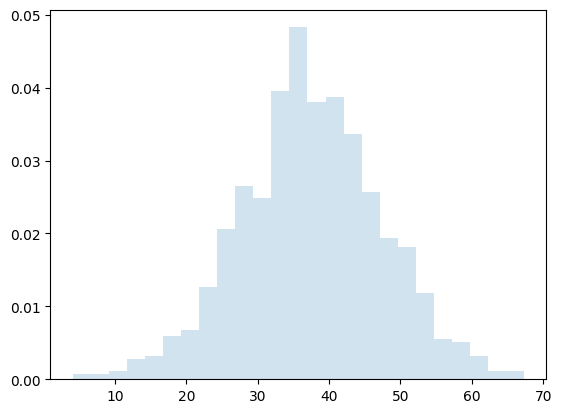

In [19]:
x = np.linspace(RV_gauss.ppf(0.01),RV_gauss.ppf(0.99), 100)
plt.hist(RV_gauss.rvs(size=1000), density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.plot(x, RV_gauss.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf') 

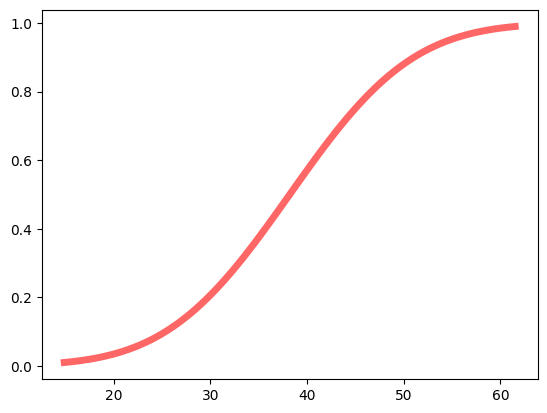

In [24]:
plt.plot(x, RV_gauss.cdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf') 

In [1]:
def fit_distribution(self, name, distribution):
        params = distribution.fit(self.data_array)
        rv = distribution(*params)
        self.distributions[name] = {'params': params, 'instance': rv}